In [1]:
from dynamics import base, creator, model
from dynamics.asset import Asset
from dynamics.tools import Body, kinectic, potentialGrav, rotation, solution
from dynamics.tools.solver import euler, improved_euler, RK2, RK4

In [15]:
simulation = base.Simulation()

body = creator.create('body', Body, **{'mass':1, 'drag_coeff':0.4, 'length':1})
sol = solution.Solution(disp_0=3.12, velo_0=0)
asset = Asset(**{'name': 'mass', 'var_name': 'theta', 'component': body, 'motion_func': rotation, 'solution': sol})

simulation.register('model', model.Model(asset))
simulation.register('solver', RK4)

In [16]:
simulation.model.acceleration()[0]

thetaddot(t) - 0.4*thetadot(t) - 9.80665*sin(theta(t))

In [17]:
simulation.set_paramters(time_step=25e-3, time_end=15)
simulation.run()

100%|██████████| 600/600 [00:05<00:00, 110.68it/s]


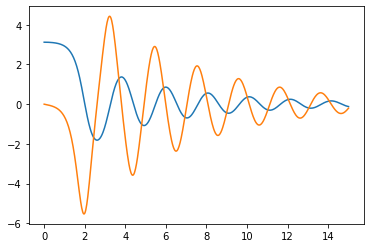

In [18]:
import matplotlib.pyplot as plt 
import numpy as np
solu = simulation.results
plt.plot(solu['time'], solu['displacement'])
plt.plot(solu['time'], solu['velocity'])
plt.show()

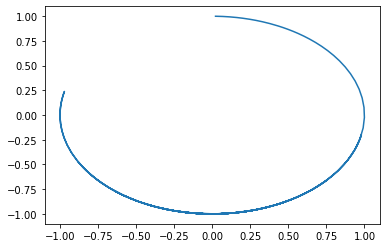

In [19]:
plt.plot(solu['x'][:], solu['y'][:])
plt.show()

In [ ]:
simulation.results.clear()